<a href="https://colab.research.google.com/github/jeisianemacedo/compiladores/blob/main/Trabalho_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidade Federal da Bahia**

**Disciplina:** Processamento Digital de Sinais

**Discentes:** Eduardo Santana e Jeisiane Silva

**Implementação de Filtros Digitais**

**3º Projeto**

---



In [ ]:
import scipy

#Valor de beta parâmetro de forma
A = 55
beta = 0.1102*(A - 8.7)
print("O valor de beta e",beta)
#A largura de transição Deltaw
deltaw = 0.05*scipy.pi
wc= scipy.pi/2
wp = wc- deltaw/2
ws = wc + deltaw/2
print("O valor de largura de transicao e",deltaw)
#Valor aprocimado de M
M = round((A - 8)/(2.285*deltaw))
#alfa
a = M/2
print("O numero de pontos e",M)


O valor de beta e 5.10226
O valor de largura de transicao e 0.15707963267948966
O numero de pontos e 131


Text(0.5, 0, 'Amostras')

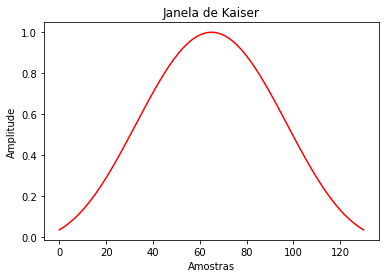

In [78]:
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

#print(M,beta)
window = signal.windows.kaiser(M, beta)
plt.plot(window, linestyle = '-', color = 'red')
plt.title("Janela de Kaiser")
plt.ylabel("Amplitude")
plt.xlabel("Amostras")


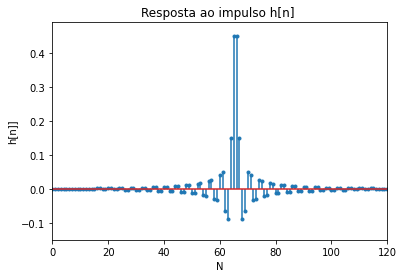

In [ ]:
import math
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

n=0 
hlp_n_geral = []
w_n_geral =[]
h_n = []
h_n_g = []
for n in range (0,132,1): 
  hlp_n = (math.sin(1.57*(n - 65.5)))/(scipy.pi*(n-65.5)) 
  w_n = scipy.special.i0(beta*(1 -((n- M/2 )/65.5)**2)**(1/2))/(scipy.special.i0(beta)) 
  
  n=n+1
  #print(n)
  hlp_n_geral.append(hlp_n)
  w_n_geral.append(w_n)
  h_n.append(hlp_n*w_n)
  #h_n_g.append(hlp_n*w_n*1000)
  #print(hep_n)
#print(hlp_n_geral) #valores de hl[n]
#print(w_n_geral) #valores de w[n]
#print(h_n)


k = np.arange(0,132)
x= h_n
plt.title(r"Resposta ao impulso h[n] ")
plt.ylabel("h[n]]")
plt.xlabel("N")
plt.axis([0, 120, -0.15,0.49])
markerline, stemlines, baseline = plt.stem(
    k, x, linefmt ='-', markerfmt ='.',
    bottom = 0    , use_line_collection = True)

plt.show()

[-0.5        -0.49951148 -0.49902296 ...  0.49902296  0.49951148
  0.5       ]


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

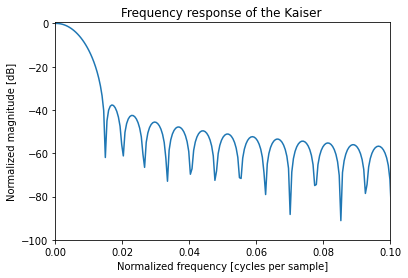

In [77]:
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
print(freq)
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([0, 0.1, -100, 0.5])
plt.title(r"Frequency response of the Kaiser ")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")


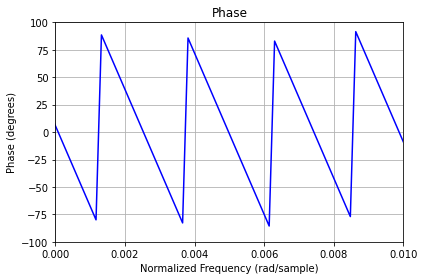

In [ ]:
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
#plt.subplot(212)
plt.title('Phase')
angles = np.unwrap(np.angle(A))
anglesGrad=(360*angles)/(2*np.pi)
plt.plot(freq/np.pi,anglesGrad,'b')
plt.axis([0,0.01,-100,100])
plt.grid(True)
plt.xlabel('Normalized Frequency (rad/sample)')
plt.ylabel('Phase (degrees)')
plt.tight_layout()

In [ ]:
!git clone https://github.com/AllenDowney/ThinkDSP.git
!pip install thinkx

fatal: destination path 'ThinkDSP' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 107 kB/s 
  Created wheel for thinkx: filename=thinkx-1.1.3-py3-none-any.whl size=59942 sha256=6f1eb8760a885ec469ed11d1b2f95b69921bf79763b178a3319461a745279f65
  Stored in directory: /root/.cache/pip/wheels/48/28/47/bcd375ed163bf0ab5364d98faca0626adae06e4976ac93f8ae
Successfully built thinkx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement thinkdsp (from versions: none)
ERROR: No matching distribution found for thinkdsp


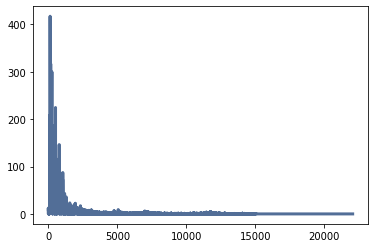

Writing sound.wav


In [ ]:
!pip install thinkdsp
import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

# Read in audio file
wave = thinkdsp.read_wave('test.wav')

# Grab first 10 seconds of audio (you can ignore me)
clipLength = 10 # in seconds
index = 0
while (index < wave.ts.size and wave.ts[index] < clipLength):
	index += 1
# Remove extras
wave.ts = wave.ts[:index]
wave.ys = wave.ys[:index]


# Filter
spectrum = wave.make_spectrum()
spectrum.low_pass(cutoff = 0.25, factor = .1)
#spectrum.high_pass(cutoff = 1500, factor = .1) # FIXME - Change back to low pass filter
filteredWave = spectrum.make_wave()

# Plot spectrum of audio file
spectrum = filteredWave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play filtered audio file
filteredWave.play()
IPython.display.Audio('sound.wav')